In [49]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [50]:
def dilation(thresh_img):
    padded_arr =np.zeros((img.shape[0]+2,img.shape[1]+2))
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            padded_arr[i+1][j+1] = thresh_img[i][j]

    struc_ele=np.array([[255,255,255],[255,255,255],[255,255,255]])
    dilated_img=np.zeros(img.shape,'uint16')
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            if (np.sometrue(np.equal(struc_ele,padded_arr[i:i+3,j:j+3]))):
                dilated_img[i][j]=255
            else:
                dilated_img[i][j]=0
    return dilated_img

In [51]:
def erosion(thresh_img):
    padded_arr =np.zeros((img.shape[0]+2,img.shape[1]+2))
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            padded_arr[i+1][j+1] = thresh_img[i][j]

    struc_ele=np.array([[255,255,255],[255,255,255],[255,255,255]])
    eroded_img=np.zeros(img.shape,'uint16')
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            if (np.alltrue(np.equal(struc_ele,padded_arr[i:i+3,j:j+3]))):
                eroded_img[i][j]=255
            else:
                eroded_img[i][j]=0
    return eroded_img

In [55]:
def plot(img):
    plt.figure(figsize=(20,20))

    plt.subplot(2,3,1)
    plt.title('original')
    plt.imshow(img,'gray')

    plt.subplot(2,3,2)
    plt.title('black_white')
    (thresh, thresh_bw) = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)
    plt.imshow(thresh_bw,'gray')
    
    plt.subplot(2,3,3)
    plt.title('erosion')
    e=erosion(thresh_bw)
    plt.imshow(e,'gray')
    
    plt.subplot(2,3,4)
    plt.title('dilation')
    d=dilation(thresh_bw)
    plt.imshow(d,'gray')
    
    plt.subplot(2,3,5)
    plt.title('opening')
    open_img=erosion(dilation(thresh_bw))
    plt.imshow(open_img,'gray')
    
    plt.subplot(2,3,6)
    plt.title('closing')
    close_img=dilation(erosion(thresh_bw))
    plt.imshow(close_img,'gray')

    plt.tight_layout()

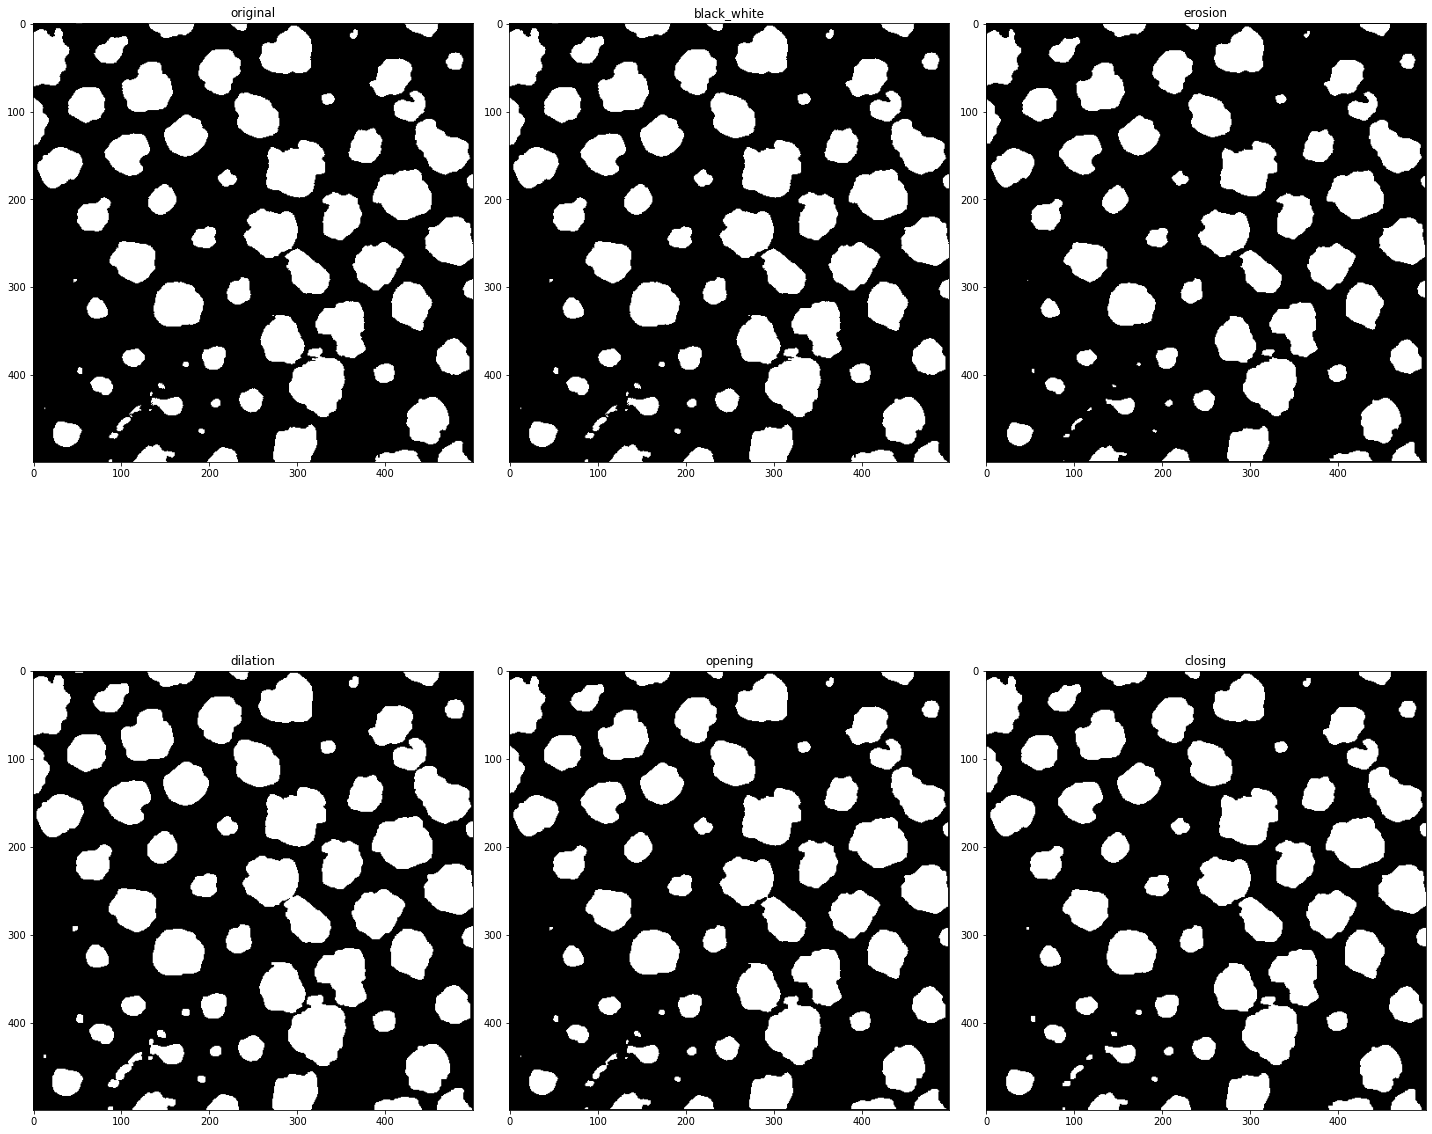

In [53]:
img = cv2.imread('orig_image.png',0)
plot(img)

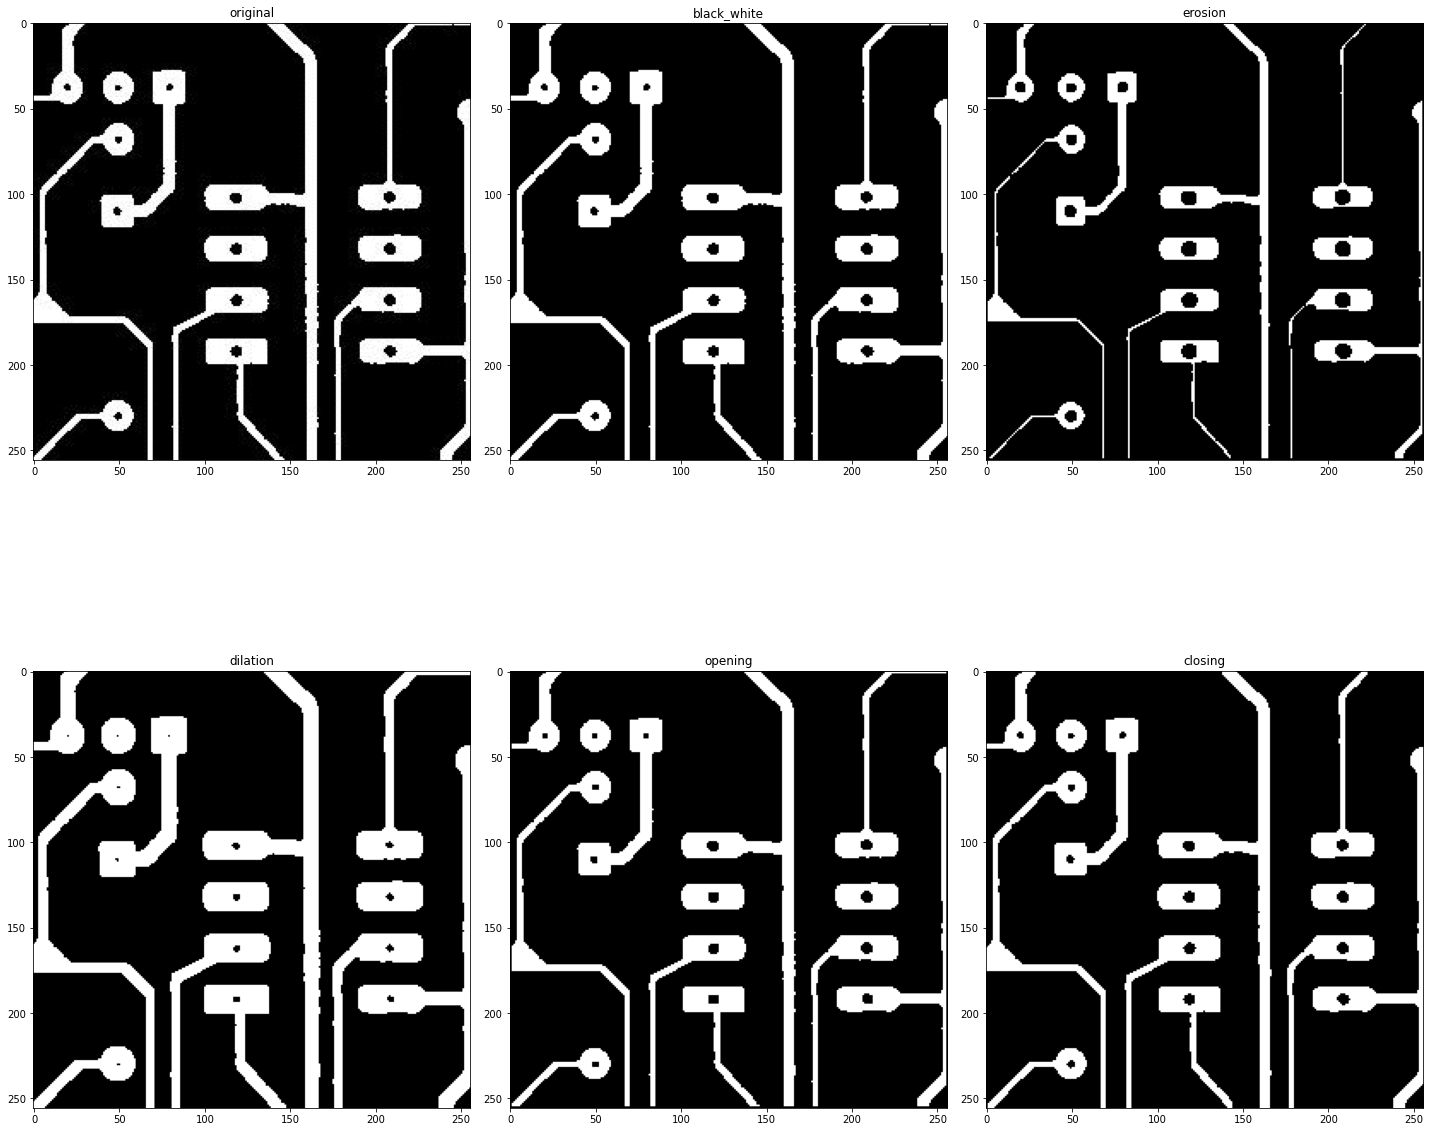

In [56]:
img = cv2.imread('circuits.png',0)
plot(img)